In [2]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPAR'\
                'AMS=2014-15&ContextFilter=&ContextMeasure=FGA&DateFrom=&D'\
                'ateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Loca'\
                'tion=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&'\
                'PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID=201935&Plu'\
                'sMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&Seas'\
                'onSegment=&SeasonType=Regular+Season&TeamID=0&VsConferenc'\
                'e=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&sh'\
                'owZones=0'

In [3]:
# Get the webpage containing the data
response = requests.get(shot_chart_url)
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

In [8]:
shot_df = pd.DataFrame(shots, columns=headers)
# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shot_df.head())


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021400003,18,201935,James Harden,1610612745,Houston Rockets,1,9,58,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,226,39,1,0
1,Shot Chart Detail,0021400003,39,201935,James Harden,1610612745,Houston Rockets,1,8,25,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-15,15,1,0
2,Shot Chart Detail,0021400003,41,201935,James Harden,1610612745,Houston Rockets,1,8,21,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-232,110,1,1
3,Shot Chart Detail,0021400003,95,201935,James Harden,1610612745,Houston Rockets,1,4,32,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-146,135,1,0
4,Shot Chart Detail,0021400003,120,201935,James Harden,1610612745,Houston Rockets,1,2,38,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-8,22,1,1


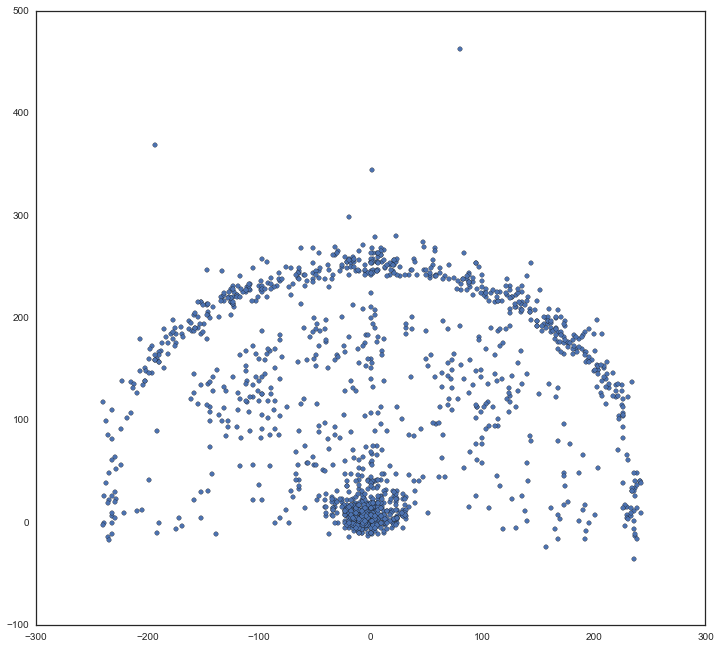

In [9]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
plt.show()

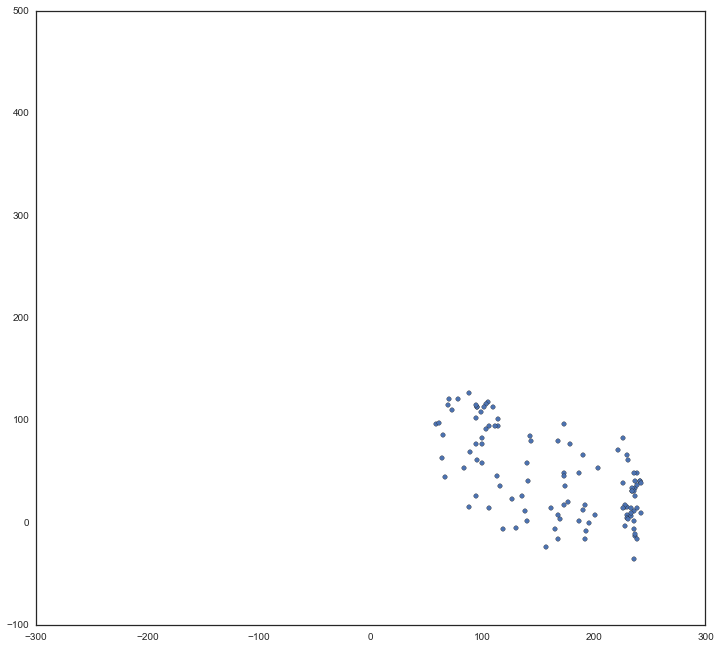

In [10]:
right = shot_df[shot_df.SHOT_ZONE_AREA == "Right Side(R)"]
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [11]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

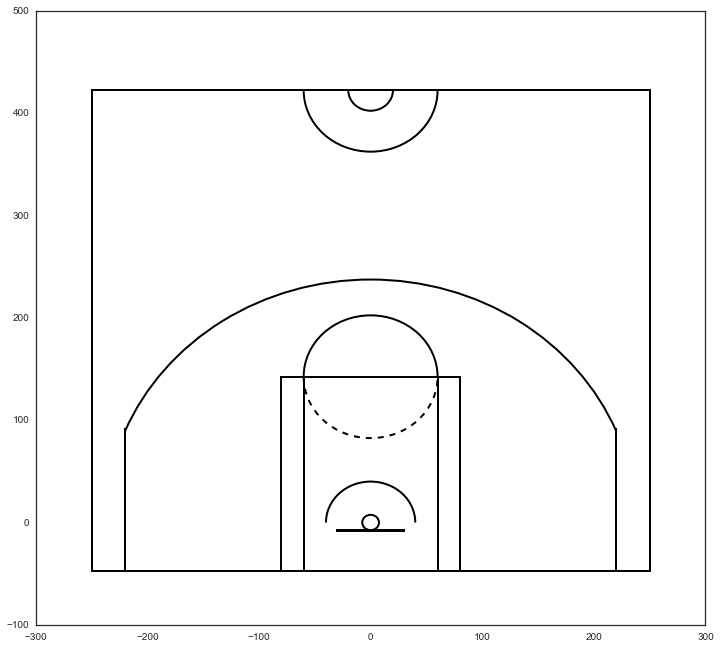

In [12]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

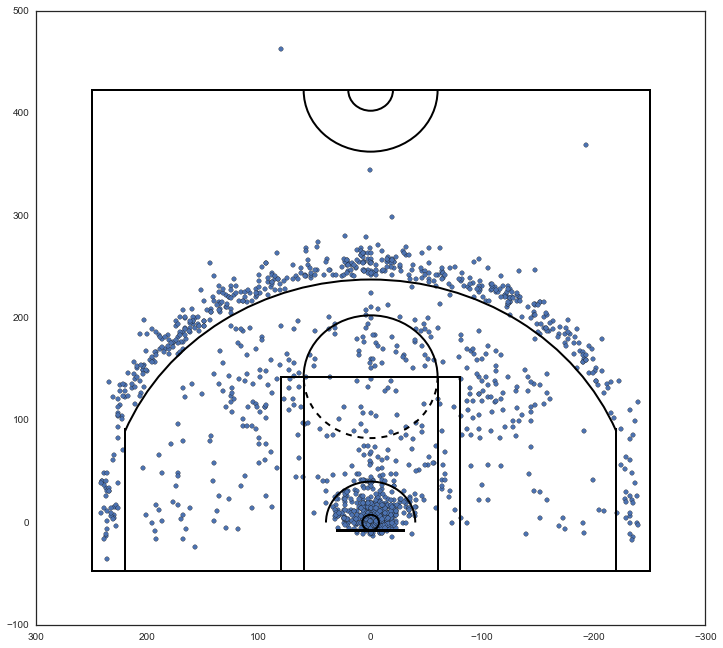

In [13]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

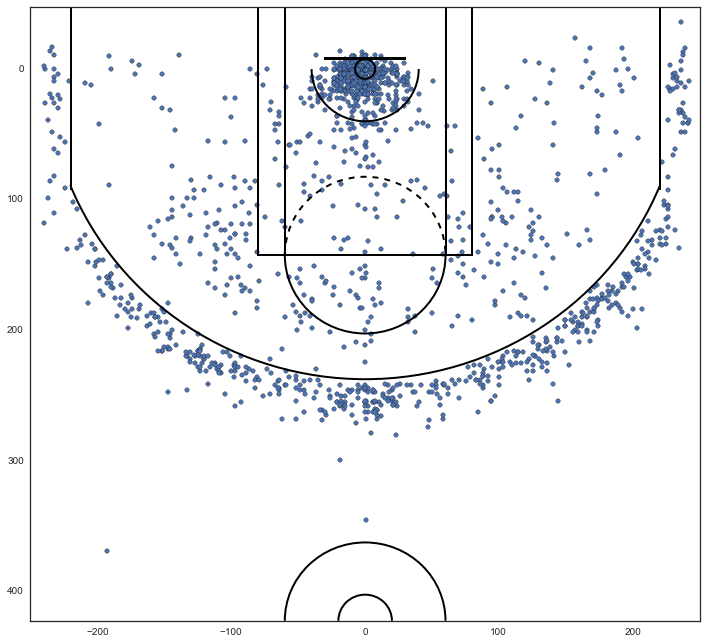

In [14]:


plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()



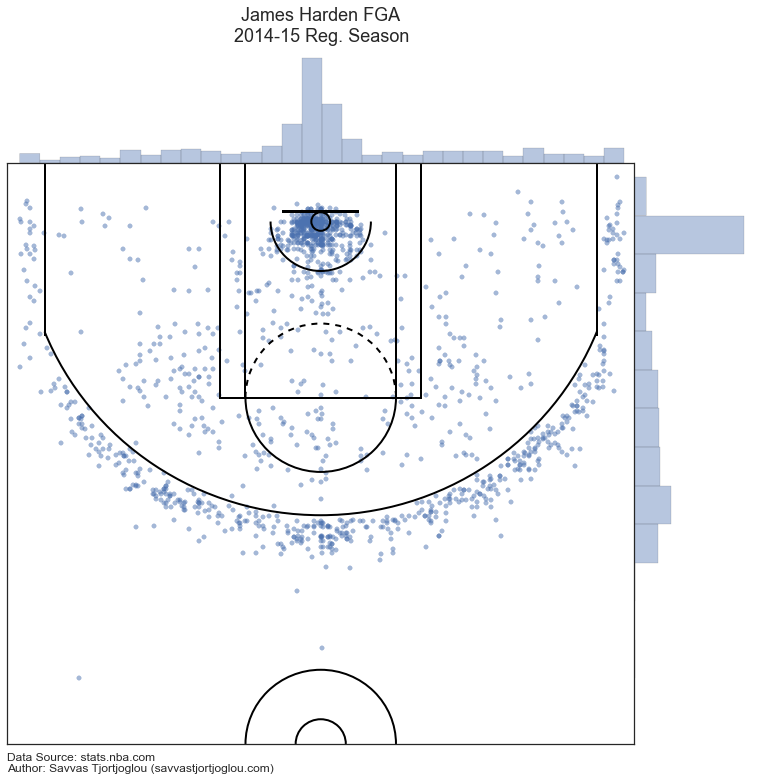

In [15]:
# create our jointplot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',
        fontsize=12)

plt.show()

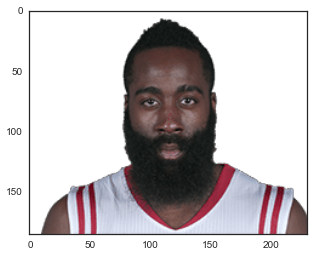

In [22]:
import urllib
# we pass in the link to the image as the 1st argument
# the 2nd argument tells urlretrieve what we want to scrape
pic = urllib.urlretrieve("http://stats.nba.com/media/players/230x185/201935.png",
                                "201935.png")

# urlretrieve returns a tuple with our image as the first 
# element and imread reads in the image as a 
# mutlidimensional numpy array so matplotlib can plot it
harden_pic = plt.imread(pic[0])

# plot the image
plt.imshow(harden_pic)
plt.show()

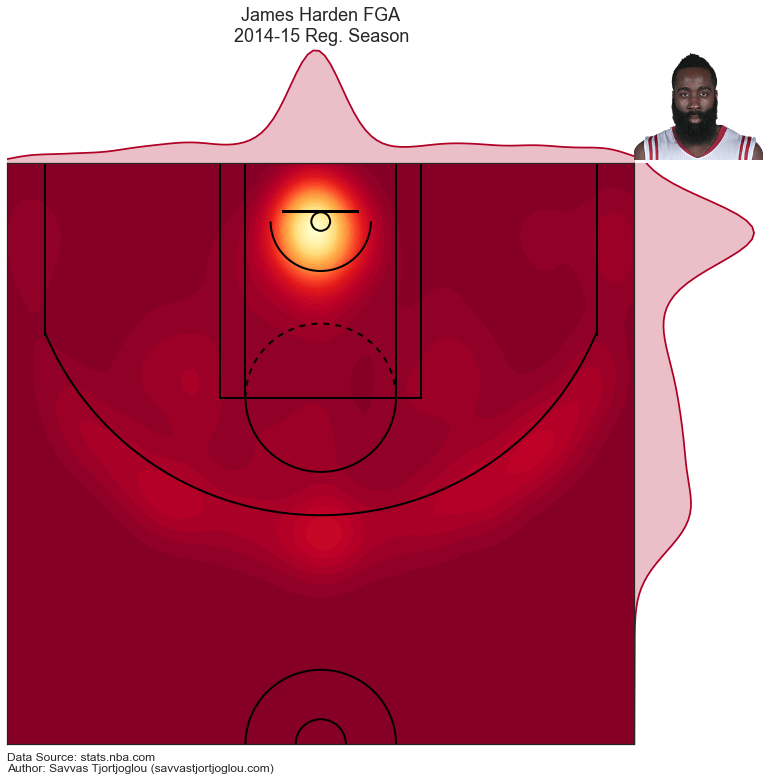

In [23]:
from matplotlib.offsetbox import  OffsetImage

# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',
        fontsize=12)

# Add Harden's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough 
# to fit on our plot
img = OffsetImage(harden_pic, zoom=0.6)
# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be
img.set_offset((625,621))
# add the image
ax.add_artist(img)

plt.show()

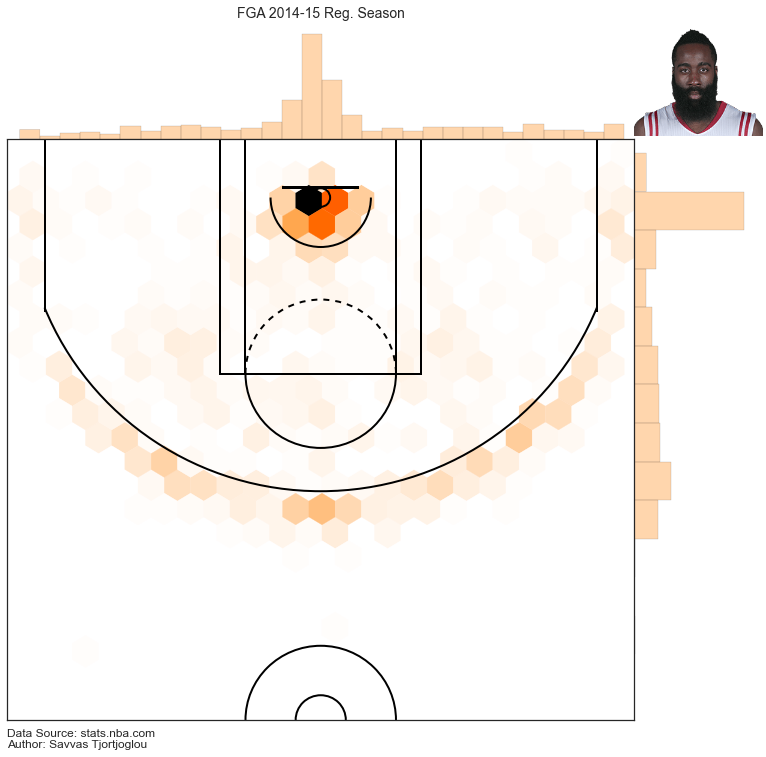

In [24]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('FGA 2014-15 Reg. Season', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou', fontsize=12)

# Add James Harden's image to the top right
img = OffsetImage(harden_pic, zoom=0.6)
img.set_offset((625,621))
ax.add_artist(img)

plt.show()